In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_examples, test_examples = dataset['train'], dataset['test']

In [4]:
encoder = info.features['text'].encoder

In [5]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [6]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [7]:
assert original_string == sample_string

In [8]:
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [10]:
train_dataset = (train_examples
                 .shuffle(BUFFER_SIZE)
                 .padded_batch(BATCH_SIZE, padded_shapes=([None],[])))

test_dataset = (test_examples
                .padded_batch(BATCH_SIZE,  padded_shapes=([None],[])))

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [12]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 1529s 4s/step - loss: 0.6574 - accuracy: 0.5400 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 3962s 10s/step - loss: 0.3623 - accuracy: 0.8462 - val_loss: 0.3485 - val_accuracy: 0.8583
Epoch 3/10
391/391 [==============================] - 11883s 30s/step - loss: 0.2575 - accuracy: 0.8997 - val_loss: 0.3505 - val_accuracy: 0.8557
Epoch 4/10
391/391 [==============================] - 3409s 9s/step - loss: 0.2178 - accuracy: 0.9195 - val_loss: 0.3516 - val_accuracy: 0.8630
Epoch 5/10
391/391 [==============================] - 2764s 7s/step - loss: 0.1889 - accuracy: 0.9318 - val_loss: 0.3445 - val_accuracy: 0.8552
Epoch 6/10
391/391 [==============================] - 45991s 118s/step - loss: 0.1710 - accuracy: 0.9397 - val_loss: 0.3563 - val_accuracy: 0.8552
Epoch 7/10
391/391 [==============================] - 3928s 10s/step - loss: 0.1593 - accuracy: 0.9439 - val_loss: 0.3603 

In [14]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 314s 803ms/step - loss: 0.4550 - accuracy: 0.8574
Test Loss: 0.45500254044142524
Test Accuracy: 0.8574000000953674


In [15]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [16]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [17]:
with open ('text.txt', 'r') as infile:
    text_data = infile.read()
    print (infile.read())

print(text_data)
# predict on a sample text without padding.

sample_pred_text = text_data
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)


[('"I', 'am', 'excited'), ('am', 'excited', 'to'), ('excited', 'to', 'be'), ('to', 'be', 'finish'), ('be', 'finish', 'my'), ('finish', 'my', 'project.'), ('my', 'project.', '"')]Positive
[[2.5860517]]


In [18]:
with open ('text.txt', 'r') as infile:
    text_data = infile.read()
    print (infile.read())

print(text_data)

# predict on a sample text with padding
sample_pred_text = text_data
# but in the text file 
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)


[('"I', 'am', 'excited'), ('am', 'excited', 'to'), ('excited', 'to', 'be'), ('to', 'be', 'finish'), ('be', 'finish', 'my'), ('finish', 'my', 'project.'), ('my', 'project.', '"')]Positive
[[2.5860517]]


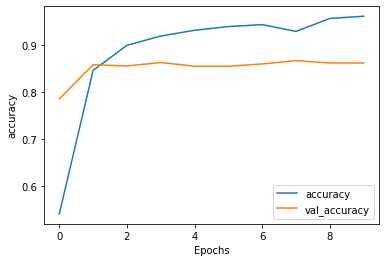

In [19]:
plot_graphs(history, 'accuracy')

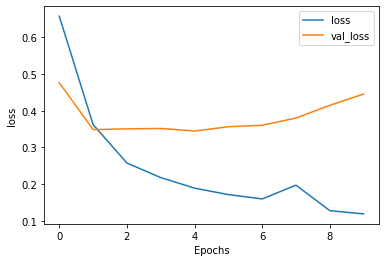

In [20]:
plot_graphs(history, 'loss')